# Resumo

Nesse notebook, uma Rede Neural Convolucional é criada e treinada com Tensorflow para realizar previsões para os dados do dataset Fashion MNIST.<br>
O dataset é composto por 28x28x1, divididas em 10 classes que representam peças de roupas.

# Importação dos recursos

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Conv2D, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import fashion_mnist

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# Pré-processamento dos dados

In [3]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [6]:
y_train.shape

(60000,)

In [7]:
# normalizando os dados previsores
X_train, X_test = X_train / 255.0, X_test / 255.0 # add o .0 pra garantir que os dados ficarão em formato float

In [8]:
# adicionando a dimensão de cor nos dados previsores, algo que a CNN necessita
X_train = np.expand_dims(X_train, -1) # add uma dimensão ao final do array de shape
X_test = np.expand_dims(X_test, -1)
X_train.shape

(60000, 28, 28, 1)

In [9]:
# pega o número de classes
K = len(set(y_test)) # tamanho do set, sendo que o set só pode ter valores únicos
K

10

# Montagem do modelo

In [10]:
i = Input(shape = X_train[0].shape)
x = Conv2D(32, (3, 3), strides = 2, activation = 'relu')(i) # 32 filtros de tamanho 3x3, stride de 2, ativação ReLU
x = Conv2D(64, (3, 3), strides = 2, activation = 'relu')(x)
x = Conv2D(128, (3, 3), strides = 2, activation = 'relu')(x)

x = Flatten()(x)

x = Dropout(0.2)(x) # aplica um dropout a camada flattened
x = Dense(512, activation = 'relu')(x)
x = Dropout(0.2)(x) # aplica um dropout a camada oculta
x = Dense(K, activation = 'softmax')(x)

In [11]:
classifier = Model(i, x) # contrói um modelo de 1 input e 1 output

In [12]:
# compila o modelo com otimizador adam, função de custo sparse categorical crossentropy, pois as classes são representadas por inteiros, e métrica de precisão "accuracy"
classifier.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

O uso de sparse categorical crossentropy se dá pelo fato de que as classes são representadas por valores inteiros, não estão no formato One Hot.

In [13]:
r = classifier.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 15)

Epoch 1/15


I0000 00:00:1726248473.257431     101 service.cc:145] XLA service 0x7b5550004610 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1726248473.257488     101 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


  73/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4427 - loss: 1.6599

I0000 00:00:1726248477.933007     101 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.7484 - loss: 0.6920 - val_accuracy: 0.8473 - val_loss: 0.4033
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8619 - loss: 0.3703 - val_accuracy: 0.8706 - val_loss: 0.3479
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8813 - loss: 0.3166 - val_accuracy: 0.8816 - val_loss: 0.3219
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8907 - loss: 0.2876 - val_accuracy: 0.8831 - val_loss: 0.3160
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9062 - loss: 0.2473 - val_accuracy: 0.8892 - val_loss: 0.3066
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9134 - loss: 0.2293 - val_accuracy: 0.8929 - val_loss: 0.3040
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9213 - loss: 0.2053 - val_accuracy: 0.8923 - val_loss: 0.3018
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9262 - loss: 0.1927 - val_accura

# Visualizando o desempenho do modelo

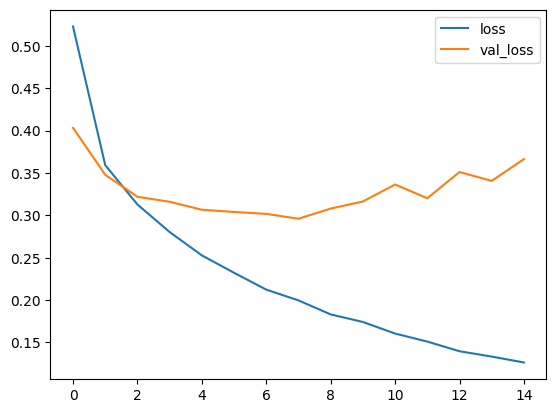

In [14]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

Podemos observar que há uma diminuição no erro para os dados de treino permanente em todo o processo.<br>
Porém, o erro para os dados de teste diminui um pouco no início, mas logo volta a aumentar.<br>
Esse comportamento de diminuição na loss e aumento na val_loss indica overfitting.

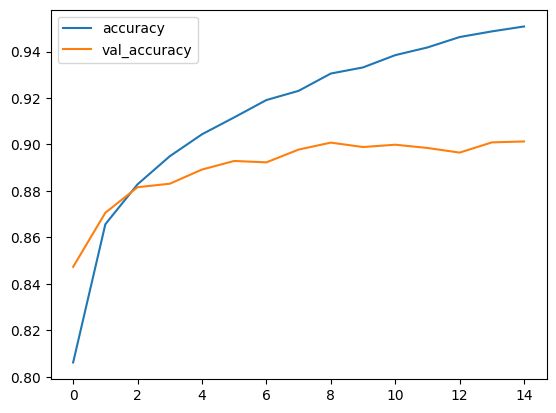

In [15]:
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend()

Observa-se que a precisão calculada nos dados de teste aumenta um pouco e depois estagna, mesmo com o erro aumentando.<br>
Isso indica o modelo ficando confiante em suas previsões incorretas.<br>
Esse discrepância entre as métricas dos dados de teste pode ser explicada pelo fato de que, dado o funcionamento da função Sparse Categorical Crossentropy, o erro aumenta conforme a previsão se distancia da resposta correta, porém, uma previsão incorreta ficar "mais incorreta" não afeta a precisão calculada pela função "accuracy", dado que, para essa métrica, só importa se a resposta estava ou não correta, independente do quão distante ficou da resposta correta nos casos de erro.

## Visualizando a matriz de confusão em um mapa de calor

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Not normalized confusion matrix
[[883   0  16  29   4   1  60   0   7   0]
 [  1 980   1  12   1   0   3   0   2   0]
 [ 19   2 844  25  40   0  68   0   2   0]
 [ 10   6  10 928  28   2  15   0   1   0]
 [  1   3  57  25 831   0  79   0   4   0]
 [  1   0   0   1   0 970   0  19   1   8]
 [136   1  70  34  74   0 667   0  18   0]
 [  0   0   0   0   0   6   0 972   0  22]
 [  2   0   2   3   5   1   4   2 979   2]
 [  1   0   0   0   0   6   0  34   0 959]]


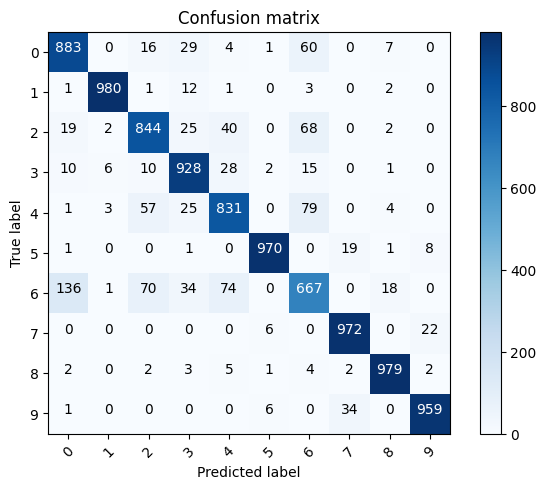

In [20]:
from itertools import product
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm, classes, normalize = False, title='Confusion matrix',
                          cmap = plt.cm.Blues): # colormap padrão é o da escala de azul (claro a escuro)
    if normalize:
        """
        Divide cada linha da matriz pela soma de seus valores, 
        normalizando cada classe independentemente.
        """
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Not normalized confusion matrix")

    print(cm) # imprime a matriz
    
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap) # cria uma mapa de calor na escala de azul com os valores de cm e interpolação Nearest Neighbor
    plt.title(title) # adiciona o título à imagem do mapa
    plt.colorbar() # adiciona uma barra de cor para explicar o mapeamento cor-valor
    tick_marks = np.arange(len(set(y_test))) # cria um array de ticks (locais para rótulos) de 0 a K, sendo K o número de classes em y_test
    plt.xticks(tick_marks, classes, rotation = 45) # adiciona os rótulos das classes nas localizações dadas por tick_marks ao longo do eixo x, com uma inclinação de 45 graus
    plt.yticks(tick_marks, classes) # adiciona os rótulos das classes nas localizações dadas por tick_marks ao longo do eixo y
    
    fmt = '.2f' if normalize else 'd' # formatará os textos das células para float de 2 casas decimais se os dados estiverem normalizados, senão serão inteiros
    thresh = cm.max() / 2 # determina um limite para a posterior mudança de cor da fonte para melhor legibilidade
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])): # itera por todas as combinações de i e j ao longo do mapa cm
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment = 'center',
                color = 'white' if cm[i, j] > thresh else 'black')
    plt.tight_layout() # evita que as tick labels, legendas e título se sobreponham
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

p_test = classifier.predict(X_test).argmax(axis = 1) # retorna o índice do elemento de maior probabilidade em cada classe (linha, axis 1)
cm = confusion_matrix(y_test, p_test) # produz e retorna a matriz de confusão dados as classes corretas e previstas
plot_confusion_matrix(cm, list(range(10))) # chama a função criada com a matriz de confusão e uma lista de 0 a 9 (classes da Fashion MNIST)
    
    

Analisando a matriz, percebe-se que o modelo está confundindo elementos da classe 6 (shirt) com elementos da classe 0 (T-shirt/top).

## Visualizando os exemplos mal classificados

In [21]:
# mapeamento dos rótulos
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split("\n")

Text(0.5, 1.0, 'True label: Shirt  Predicted: T-shirt/top')

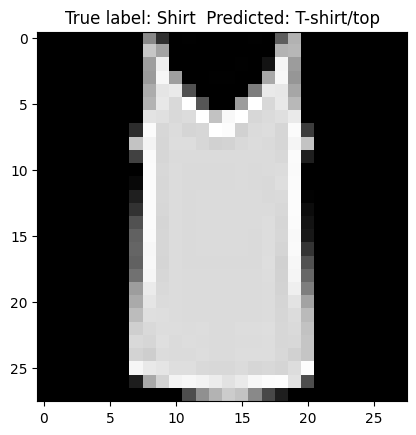

In [24]:
misclassified_idx = np.where(p_test != y_test)[0] # retorna um array contendo os índices dos elementos mal classificados
i = np.random.choice(misclassified_idx) # escolhe um índice aleatoriamente
plt.imshow(X_test[i].reshape(28, 28), cmap = 'gray')
plt.title(f'True label: {labels[y_test[i]]}  Predicted: {labels[p_test[i]]}')